In [139]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import sklearn
from sklearn.cluster import KMeans 

In [33]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.17.1.


In [34]:
df = pd.read_csv(os.path.join(os.pardir, 'data', 'activitymatrix.csv'))

In [35]:
df

,PID,2016-08-01 00:00:00,2016-08-02 00:00:00,2016-08-03 00:00:00,2016-08-04 00:00:00,2016-08-05 00:00:00,2016-08-06 00:00:00,2016-08-07 00:00:00,2016-08-08 00:00:00,2016-08-09 00:00:00,...,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00
0,y52/IZp7j0/TBTjveMIYXA==,10276.0,13449.0,11209.0,6623.0,19264.0,20470.0,12182.0,18109.0,11371.0,...,16510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LDYfW0df2JWU4AnFaFLmVg==,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ODppZY6m3q3zze5oxJibtQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fz10VSNdqFf5A08p/IriYQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,n6lpu/3qcsDGPweJw+EHdg==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,OKmgbqcD0mxvzg4C9QHrsA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,UXSMdgFpRq+VOz2mPujyhA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,QUeKN5oF5u+Owy9mM4afew==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19447.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,zmYeHSBtcFVgUICQz34JlA==,14144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,HD4TgxuuQ5hO+RXvVI7VFQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10039.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
sample_df = df.set_index('PID')
sample_df

,2016-08-01 00:00:00,2016-08-02 00:00:00,2016-08-03 00:00:00,2016-08-04 00:00:00,2016-08-05 00:00:00,2016-08-06 00:00:00,2016-08-07 00:00:00,2016-08-08 00:00:00,2016-08-09 00:00:00,2016-08-10 00:00:00,...,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00
PID,,,,,,,,,,,,,,,,,,,,,
y52/IZp7j0/TBTjveMIYXA==,10276.0,13449.0,11209.0,6623.0,19264.0,20470.0,12182.0,18109.0,11371.0,13303.0,...,16510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LDYfW0df2JWU4AnFaFLmVg==,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ODppZY6m3q3zze5oxJibtQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fz10VSNdqFf5A08p/IriYQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n6lpu/3qcsDGPweJw+EHdg==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OKmgbqcD0mxvzg4C9QHrsA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10229.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UXSMdgFpRq+VOz2mPujyhA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
QUeKN5oF5u+Owy9mM4afew==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19447.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zmYeHSBtcFVgUICQz34JlA==,14144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_train, df_test = sklearn.cross_validation.train_test_split(sample_df, train_size=0.6)

In [51]:
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
kmeans.fit(sample_df)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [56]:
labels = kmeans.labels_
print(len(labels))

242146


In [62]:
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

[[    0 27477]
 [    1 90789]
 [    2  2558]
 [    3  6303]
 [    4 29696]
 [    5 29572]
 [    6 29071]
 [    7 26680]]


Count of people in each cluster

In [64]:
sample_df['8means']=labels
sample_df

,2016-08-01 00:00:00,2016-08-02 00:00:00,2016-08-03 00:00:00,2016-08-04 00:00:00,2016-08-05 00:00:00,2016-08-06 00:00:00,2016-08-07 00:00:00,2016-08-08 00:00:00,2016-08-09 00:00:00,2016-08-10 00:00:00,...,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,8means
PID,,,,,,,,,,,,,,,,,,,,,
y52/IZp7j0/TBTjveMIYXA==,10276.0,13449.0,11209.0,6623.0,19264.0,20470.0,12182.0,18109.0,11371.0,13303.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
LDYfW0df2JWU4AnFaFLmVg==,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
ODppZY6m3q3zze5oxJibtQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
fz10VSNdqFf5A08p/IriYQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
n6lpu/3qcsDGPweJw+EHdg==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
OKmgbqcD0mxvzg4C9QHrsA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
UXSMdgFpRq+VOz2mPujyhA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
QUeKN5oF5u+Owy9mM4afew==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
zmYeHSBtcFVgUICQz34JlA==,14144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [111]:
cluster2_df = sample_df.loc[sample_df['8means'] == 2]

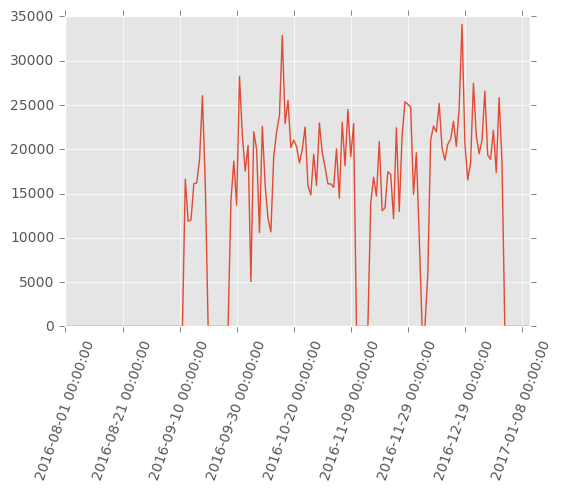

In [193]:
cluster2_df.iloc[1].plot()
plt.xticks(rotation=70)
plt.show()

In [104]:
cluster2_df[:10]

,2016-08-01 00:00:00,2016-08-02 00:00:00,2016-08-03 00:00:00,2016-08-04 00:00:00,2016-08-05 00:00:00,2016-08-06 00:00:00,2016-08-07 00:00:00,2016-08-08 00:00:00,2016-08-09 00:00:00,2016-08-10 00:00:00,...,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,8means
PID,,,,,,,,,,,,,,,,,,,,,
MlZVoZU4RcRAMdPgvTYBAw==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
/SLdF3jdGot6SYhpvgdzSA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
rICY1S8076FFoS+JdynBqg==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
FP43zWOIbRld4bL1O5hbMA==,15887.0,11782.0,12087.0,10647.0,12503.0,8916.0,15422.0,12684.0,11965.0,10024.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
MzRUFP/RsvRoeqljrPBRyQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
UCBlOJ/5X9o3FnP+euh2Bw==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
hoyv7Gd6mU0rmNQzJw+0vg==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
jZ49pWMiLejLkNPaEpXR1A==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
yfnPn8NeYTsXHxLSOMuRTw==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


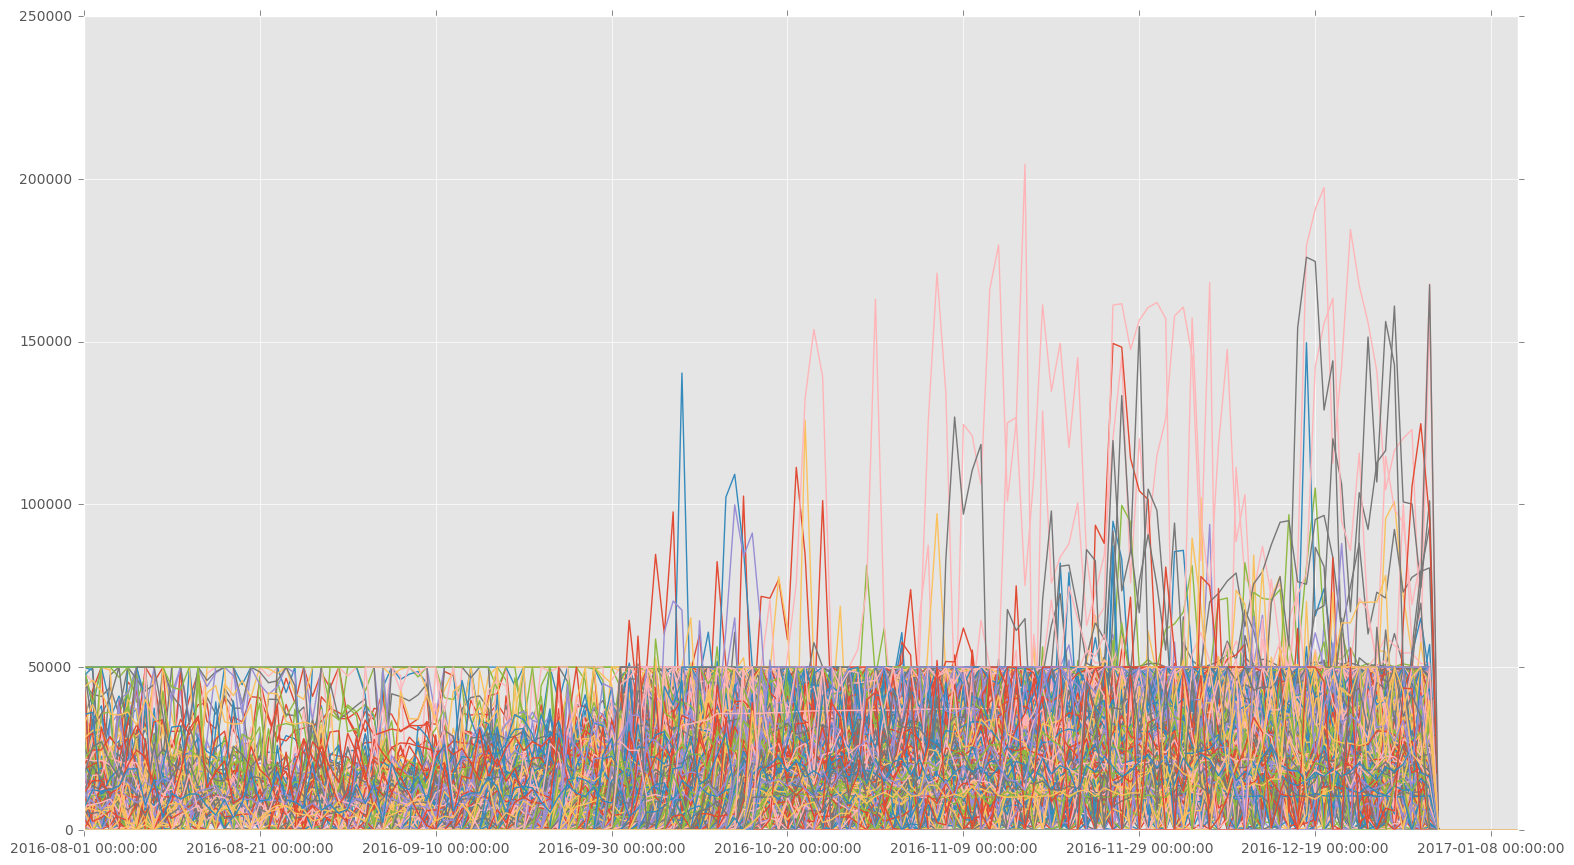

In [124]:
fig, ax = plt.subplots()
labels = []
for p in range(len(cluster2_df[:2000])):
    ax = cluster0_df.iloc[p].plot(ax=ax, kind='line')
    labels.append(cluster2_df.index[p])
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.legend_.remove()
fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)
plt.show()

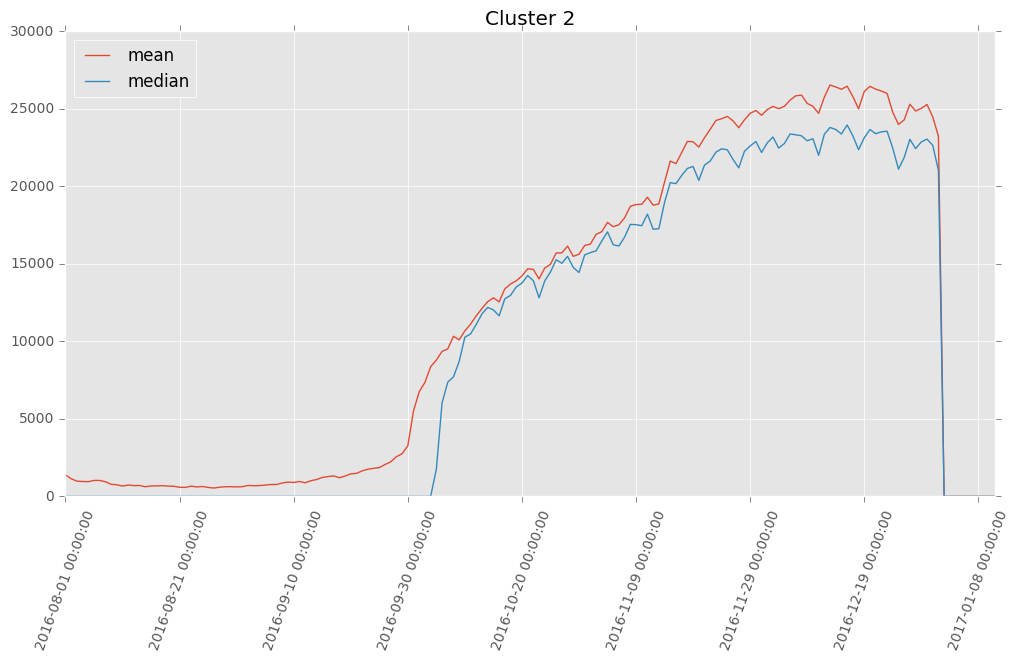

In [143]:
fig, ax = plt.subplots()
labels = []

cluster2_mean = cluster2_df.mean()
ax = cluster2_mean.plot(kind='line')
labels.append('mean')

cluster2_median = cluster2_df.median()
ax = cluster2_median.plot(kind='line')
labels.append('median')

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_title('Cluster 2')
# ax.legend_.remove()
fig.set_size_inches(12, 6)
# fig.savefig('test2png.png', dpi=100)

# myFmt = mdates.DateFormatter('%d')
# ax.xaxis_date()
# ax.xaxis.set_major_formatter(myFmt)

plt.xticks(rotation=70)
plt.show()

Gotta do this in a more pythonic way... generate one dataframe for each cluster, then plot the mean and median time series for each cluster.

In [116]:
cluster_ids = sample_df['8means'].unique()

DataFrameDict = {elem : pd.DataFrame for elem in cluster_ids}

for key in DataFrameDict.keys():
    DataFrameDict[key] = sample_df[:][sample_df['8means'] == key]

In [119]:
len(DataFrameDict[2])

2558

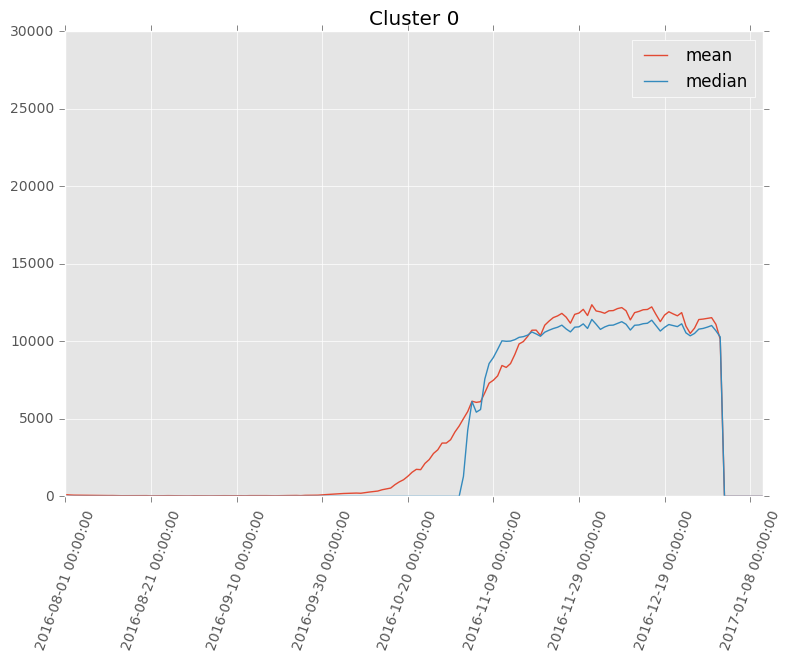

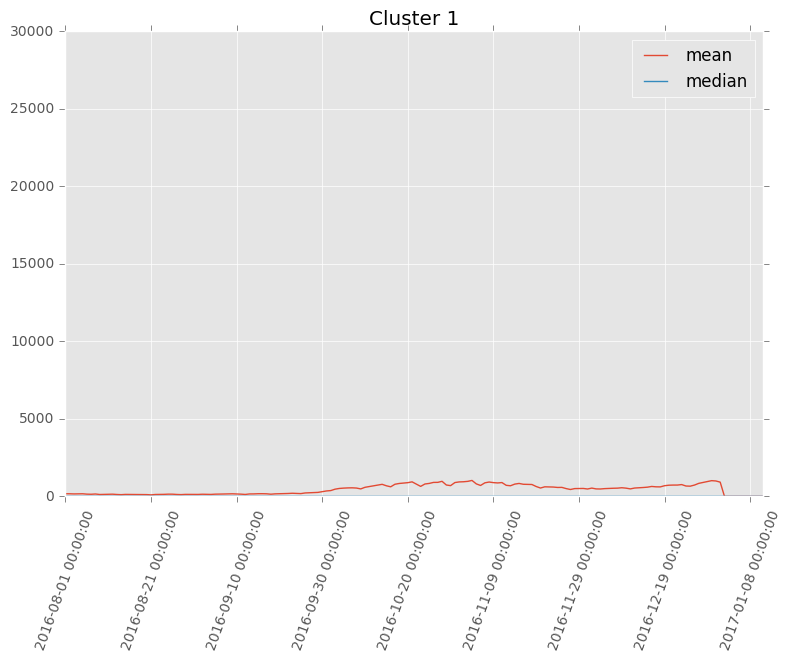

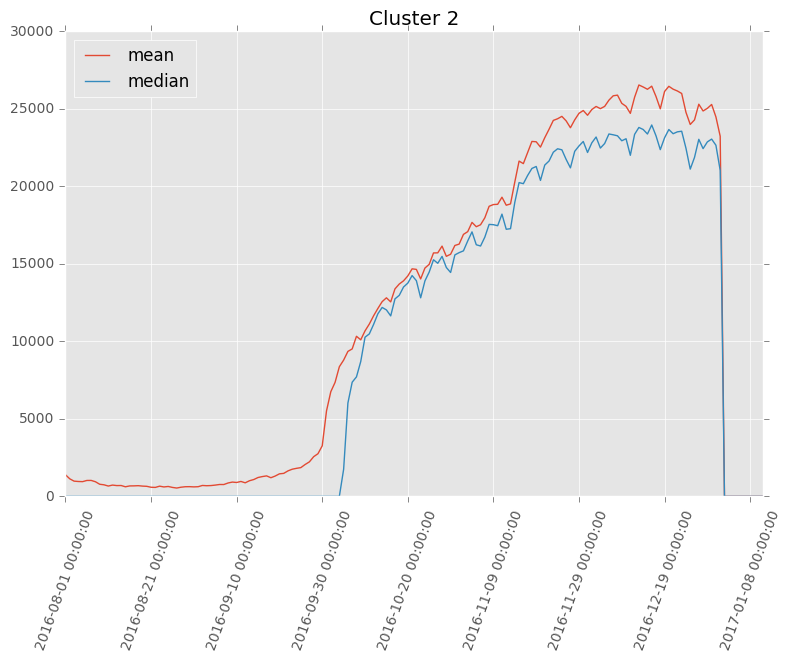

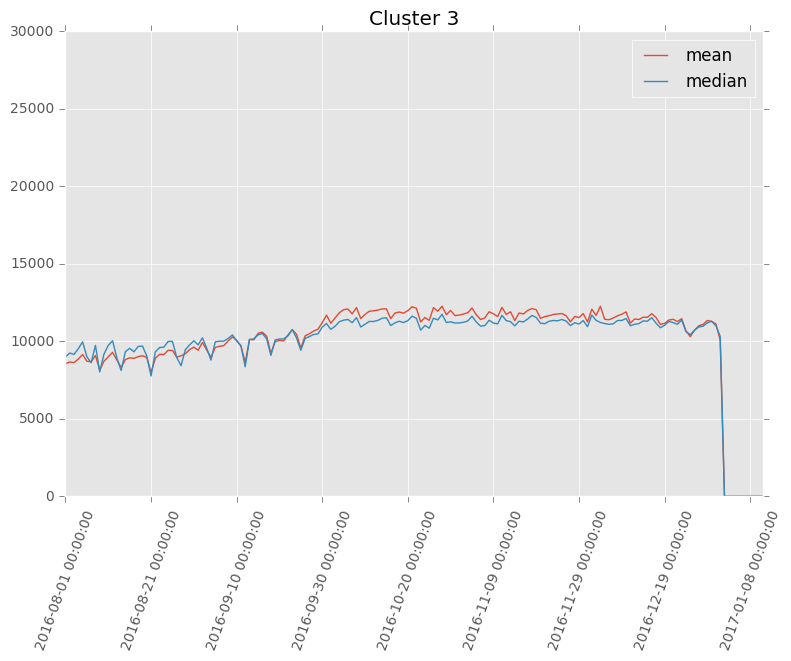

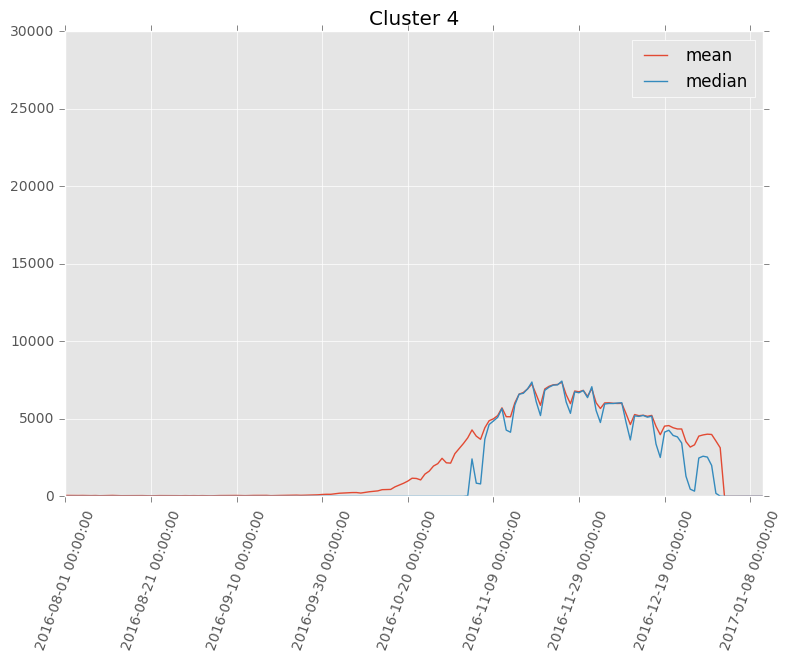

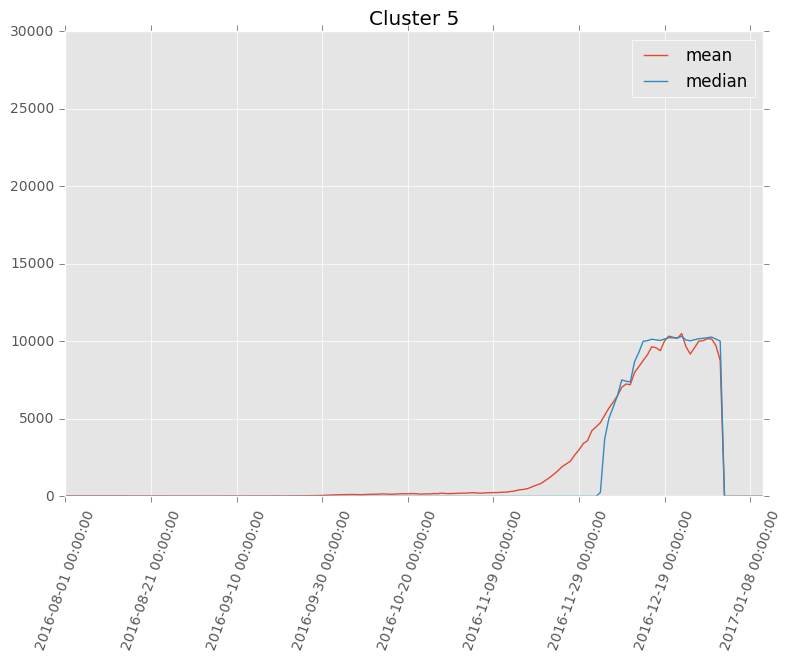

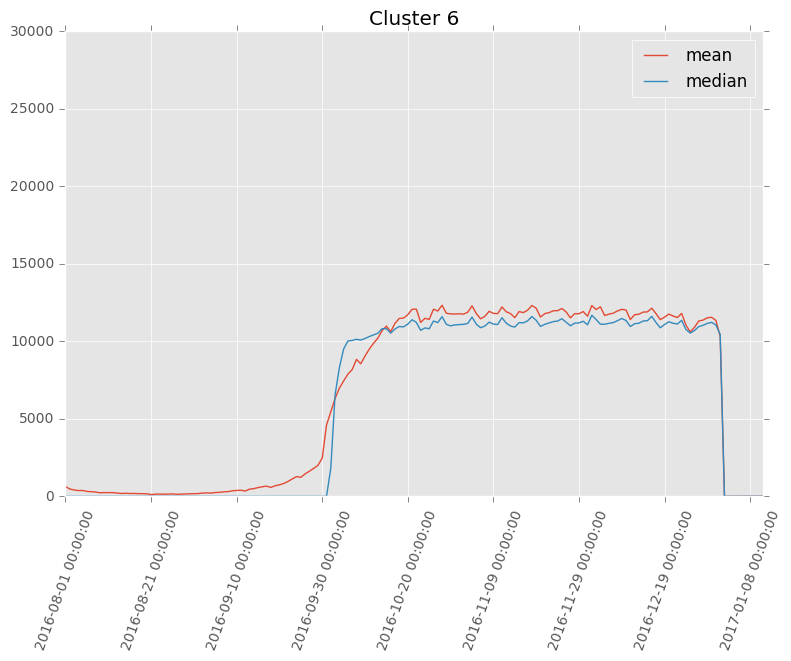

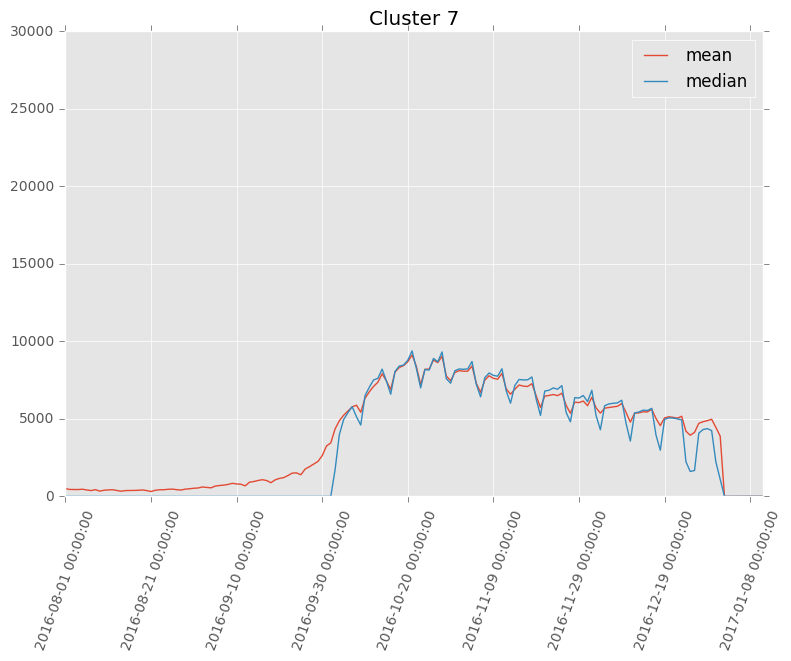

In [192]:
for key in DataFrameDict.keys():
    fig, axs = plt.subplots()
    labels = []
    cluster_df = DataFrameDict[key]
    
    cluster_mean = cluster_df.mean()
    ax = cluster_mean.plot(kind='line')
    labels.append('mean')

    cluster_median = cluster_df.median()
    ax = cluster_median.plot(kind='line')
    labels.append('median')

    lines, _ = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    ax.set_title('Cluster ' + str(key))
    plt.xticks(rotation=70)

    fig.set_size_inches(9, 6)
    plt.ylim([0, 30000])
    plt.show()

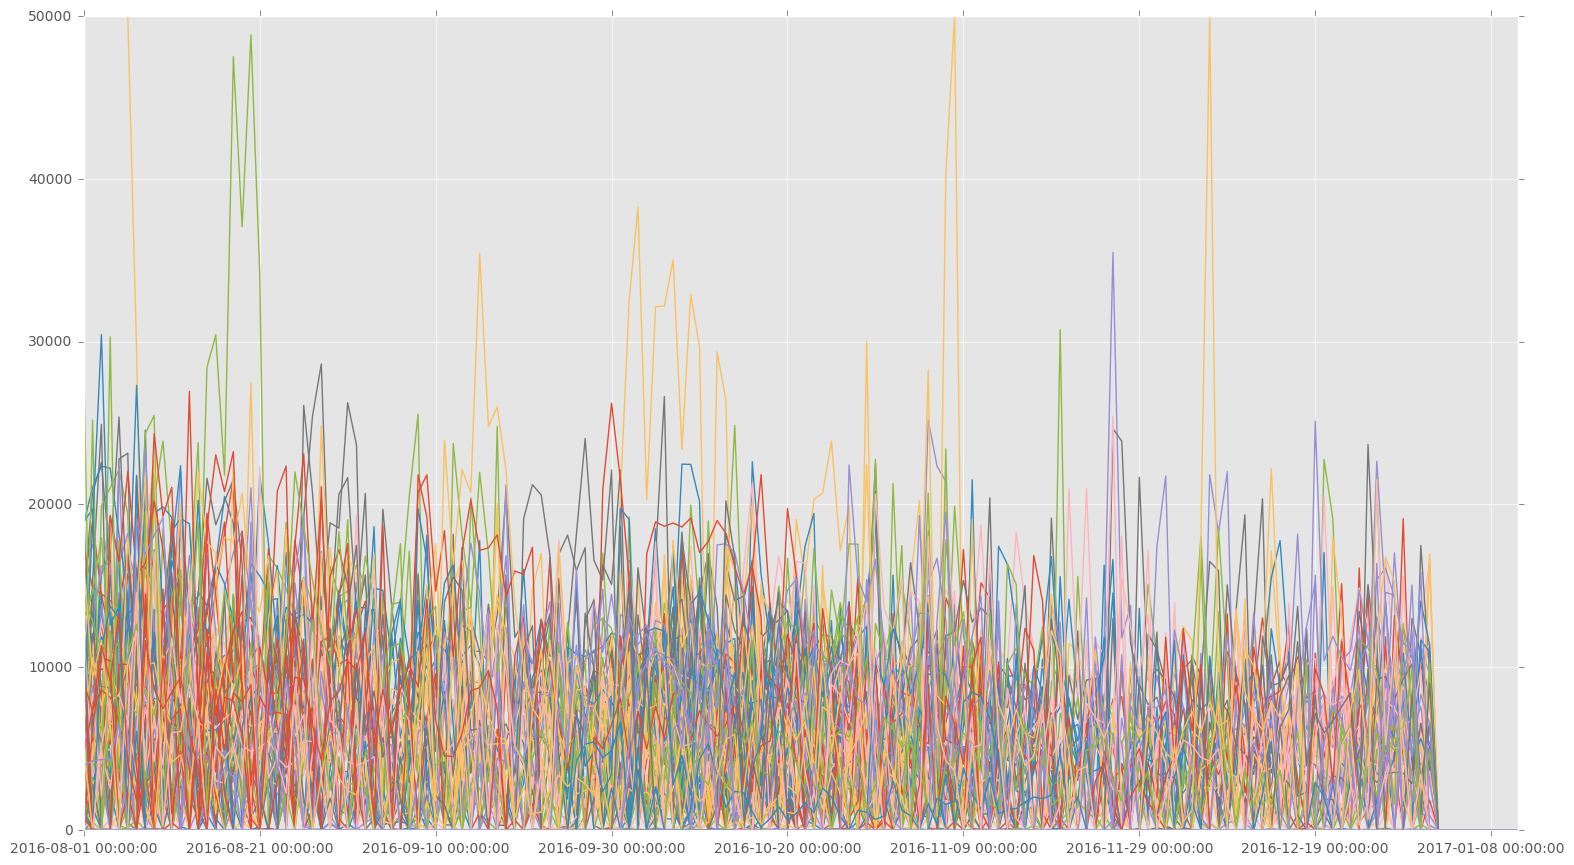

In [190]:
fig, ax = plt.subplots()
labels = []
key=1
for p in range(len(DataFrameDict[key][:500])):
    ax = DataFrameDict[key].iloc[p].plot(ax=ax, kind='line')
    labels.append(DataFrameDict[key].index[p])
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.legend_.remove()
fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)
plt.show()